### Parametric Estimation of Bin-based Density Forecast in Surveys 

- Following [Manski et al.(2009)](https://www.tandfonline.com/doi/abs/10.1198/jbes.2009.0003)
- Three cases 
   - case 1. 3+ intervals with positive probabilities, or 2 intervals with positive probabilities but open-ended from either end, to be fitted with a generalized beta distribution
   - case 2. exactly 2 adjacent and close-ended bins positive probabilities, to be fitted with a triangle distribution 
   - case 3. __one or multiple__ adjacent intervals with equal probabilities, to be fitted with a uniform distribution
   - cases excluded for now:
     - nonadjacent bins with positive probabilities with bins with zero probs in between 
     -  only one bin with positive probabilities at either end 
   

In [1]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
## import all functions from DensityEst 
## see DensityEst.ipynb for detailed explanations 

from DensityEst import GeneralizedBetaEst,GeneralizedBetaStats,TriangleEst,TriangleStats,UniformEst,UniformStats,SynDensityStat

### Test using made-up data

In [3]:
## test 1: GenBeta Dist
sim_bins= np.array([0,0.2,0.32,0.5,1.6,2])
sim_probs=np.array([0.0,0.2,0.3,0.3,0.2])
para_est = GeneralizedBetaEst(sim_bins,sim_probs)
print(para_est)
if len(para_est) != 0:
    GeneralizedBetaStats(para_est[0],
                        para_est[1],
                        para_est[2],
                        para_est[3])
else:
    print('no estimation')

lower bound is 0.2
upper bound is 2.0
4-parameter beta
[1.02524841 1.60998823 0.21046735 1.01984962]


In [4]:
## test 2: Triangle Dist
sim_bins2 = np.array([0,0.2,0.32,0.5,1,1.2])
sim_probs2=np.array([0,0.2,0.8,0,0])
para_est = TriangleEst(sim_bins2,sim_probs2)
print(para_est)
TriangleStats(para_est['lb'],
              para_est['ub'], 
              para_est['mode'])

There are two bins with positive probs
The two intervals are adjacent and not open-ended
{'lb': 0.1743769410125095, 'ub': 0.5, 'height': 6.142071161111579, 'mode': 0.1743769410125095}


{'mean': 0.3371884705062548,
 'variance': 0.004417932356015445,
 'std': 0.0664675285836283,
 'iqr1090': 0.3504556494749763,
 'skewness': 0,
 'kurtosis': -0.6}

In [5]:
## test 3: Uniform Dist with one interval
sim_bins3 = np.array([0,0.2,0.32,0.5,1,1.2])
sim_probs3 = np.array([0,0,1,0,0])
para_est= UniformEst(sim_bins3,sim_probs3)
print(para_est)
UniformStats(para_est['lb'],para_est['ub']) 

length pos bins is 1
{'lb': 0.32, 'ub': 0.5}


{'mean': 0.41000000000000003,
 'variance': 0.0026999999999999997,
 'std': 0.05196152422706632,
 'iqr1090': 0.14399999999999996,
 'skewness': 0,
 'kurtosis': -0.8333333333333334}

In [6]:
## test 4: Uniform Dist with multiple adjacent bins with same probabilities 
sim_bins4 = np.array([0,0.2,0.32,0.5,1,1.2])
sim_probs4=np.array([0.2,0.2,0.2,0.2,0.2])
para_est= UniformEst(sim_bins4,
                     sim_probs4)
print(para_est)
UniformStats(para_est['lb'],
             para_est['ub']) 

length of pos bins is > 1
{'lb': 0.0, 'ub': 1.2}


{'mean': 0.6,
 'variance': 0.12,
 'std': 0.34641016151377546,
 'iqr1090': nan,
 'skewness': 0,
 'kurtosis': -0.8333333333333334}

In [7]:
## test 5: Uniform Dist with multiple non-adjacent bins with equal probabilities
## totally excluded from current estimation 

sim_bins5 = np.array([0,0.2,0.32,0.5,1,1.2])
sim_probs5= np.array([0,0.5,0,0.5,0])
para_est = UniformEst(sim_bins5,
                     sim_probs5)
print(para_est)
UniformStats(para_est['lb'],
             para_est['ub']) 

{'lb': nan, 'ub': nan}


{'mean': nan,
 'variance': nan,
 'std': nan,
 'iqr1090': nan,
 'skewness': nan,
 'kurtosis': nan}

### Test with simulated data from known distribution 
- we simulate data from a true beta distribution with known parameters
- then we estimate the parameters with our module and see how close it is with the true parameters 

lower bound is 2.2329122245722167e-08
upper bound is 0.999602929989429
4-parameter beta
Estimated parameters [ 0.58404117  0.75203297 -0.04598537  0.99970955]


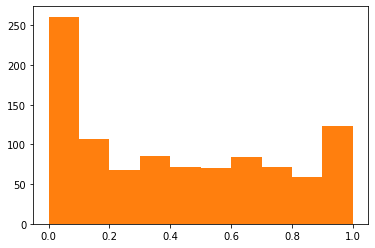

In [8]:
## simulate a generalized distribution
sim_n=1000
true_alpha,true_beta,true_loc,true_scale=0.5,0.7,0.0,1.0

sim_data = beta.rvs(true_alpha,
                    true_beta,
                    loc= true_loc,
                    scale=true_scale,
                    size=sim_n)

sim_bins2=plt.hist(sim_data)[1]
sim_probs2=plt.hist(sim_data)[0]/sim_n

sim_est = GeneralizedBetaEst(sim_bins2,
                           sim_probs2)
print('Estimated parameters',sim_est)

In [9]:
print('Estimated moments:',GeneralizedBetaStats(sim_est[0],
                          sim_est[1],
                          sim_est[2],
                          sim_est[3]))

print('True simulated moments:',
      np.mean(sim_data),
     np.std(sim_data)**2,
     np.std(sim_data)
     )

Estimated moments: {'mean': array(0.41112166), 'variance': array(0.11517086), 'std': 0.33936831986373195, 'iqr1090': 0.8044227783781251, 'skewness': array(0.23226594), 'kurtosis': array(-1.32148129)}
True simulated moments: 0.41730575448535023 0.1108701090053994 0.3329716339350837


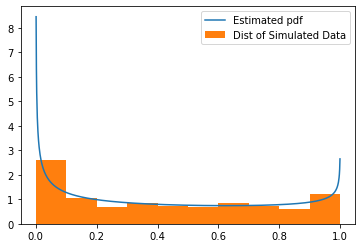

In [10]:
## plot the estimated generalized beta versus the histogram of simulated data drawn from a true beta distribution 
sim_x = np.linspace(true_loc,true_loc+true_scale,sim_n)
sim_pdf=beta.pdf(sim_x,sim_est[0],sim_est[1],loc=true_loc,scale=true_scale)
plt.plot(sim_x,sim_pdf,label='Estimated pdf')
plt.hist(sim_data,density=True,label='Dist of Simulated Data')
plt.legend(loc=0)

In [11]:
## testing the synthesized estimator function using an arbitrary example created above
print(SynDensityStat(sim_bins2,sim_probs2)['variance'])
print(SynDensityStat(sim_bins2,sim_probs2)['iqr1090'])

probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 2.2329122245722167e-08
upper bound is 0.999602929989429
4-parameter beta
0.11517085652713227
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 2.2329122245722167e-08
upper bound is 0.999602929989429
4-parameter beta
0.8044227783781251


### Estimation with real sample data (from SPF)

In [12]:
### loading probabilistic data  
sample_data =pd.read_stata('../data/sample_data.dta')   
## this is the quarterly SPF forecast on 1-year ahead core inflation 

In [13]:
sample_data.tail()

,index,date,year,quarter,ID,PRCCPI1,PRCCPI2,PRCCPI3,PRCCPI4,PRCCPI5,PRCCPI6,PRCCPI7,PRCCPI8,PRCCPI9,PRCCPI10
2088,2088,2019-01-01,2019.0,1.0,583.0,0.00,0.00,0.00,0.0,70.00,30.00,0.00,0.00,0.00,0.00
2089,2089,2019-01-01,2019.0,1.0,584.0,0.00,1.30,11.50,36.4,38.00,11.50,1.30,0.00,0.00,0.00
2090,2090,2019-01-01,2019.0,1.0,585.0,0.00,0.00,0.00,10.0,60.00,30.00,0.00,0.00,0.00,0.00
2091,2091,2019-01-01,2019.0,1.0,586.0,0.07,0.87,5.12,16.2,27.78,28.22,15.72,5.23,0.71,0.08
2092,2092,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## survey-specific parameters 
nobs=len(sample_data)
sample_bins=np.array([-10,0,0.5,1,1.5,2,2.5,3,3.5,4,10])
print("There are "+str(len(sample_bins)-1)+" bins in the sample data")

There are 10 bins in the sample data


In [15]:
##############################################
### attention: the estimation happens here!!!!!
###################################################


## creating positions 
index  = sample_data.index

columns=['Mean',
         'Var', 
         'Std',
         'Iqr1090']

sample_moment_est = pd.DataFrame(index=index,
                                 columns=columns)

## Invoking the estimation

for i in range(nobs):
    print(i)
    ## take the probabilities (flip to the right order, normalized to 0-1)
    PRCCPI_y0 = np.flip(np.array([sample_data.iloc[i,:]['PRCCPI'+str(n)]/100 for n in range(1,11)]))
    print(PRCCPI_y0)
    if not np.isnan(PRCCPI_y0).any():
        stats_est=SynDensityStat(sample_bins,PRCCPI_y0)
        if stats_est is not None and len(stats_est)>0:
            sample_moment_est['Mean'][i]= stats_est['mean']
            print(stats_est['mean'])
            sample_moment_est['Var'][i]=stats_est['variance']
            print(stats_est['variance'])
            sample_moment_est['Std'][i]=stats_est['std']
            print(stats_est['std'])
            sample_moment_est['Iqr1090'][i]=stats_est['iqr1090']
            print(stats_est['iqr1090'])           

0
[0.  0.  0.  0.  0.  0.4 0.4 0.2 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.748726168168818
1
[nan nan nan nan nan nan nan nan nan nan]
2
[nan nan nan nan nan nan nan nan nan nan]
3
[0.  0.  0.  0.  0.  0.2 0.7 0.1 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.5292669235082463
4
[0.   0.   0.   0.02 0.2  0.45 0.3  0.03 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7881011281408208
0.053449323122310016
0.2311910965463636
0.541750211633

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.2907937724412806
0.09529027682516018
0.3086912321805726
0.3420665584996288
8
[0.   0.   0.   0.   0.05 0.05 0.4  0.4  0.1  0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
2.096205121287884
0.023795986787850616
0.15425947876176238
0.540616788672823
9
[nan nan nan nan nan nan nan nan nan nan]
10
[0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6994115201543163
11
[0.  0.  0.  0.  0.1 0.6 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.5600220134373728
37
[0.   0.   0.   0.   0.05 0.15 0.6  0.2  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.8110644256805244
0.0051858824736876604
0.07201307154737716
0.5090376799230265
38
[0.   0.   0.   0.01 0.07 0.28 0.42 0.18 0.03 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 1.0
upper bound is 10.0
4-parameter beta
2.656000957211414
0.20327329035106648
0.45085839279208995
0.3518224274040172
39
[nan nan nan nan nan nan nan nan nan nan]
40
[0.   0.   0.   0.05 0.35 0.45 0.15 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.4991465400721107
0.3218255338111153
0.5672966894060949
0.2764995529125854
45
[0.  0.  0.  0.1 0.4 0.4 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999924536386797
0.034839810780418284
0.1866542546539411
0.6315261582750604
46
[0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6994115201543163
47
[nan nan nan nan nan nan nan nan nan nan]
48
[0.   0.   0.   0.   0.15 0.6  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.101324381908907
0.22514822179959557
0.4744978627977112
0.27961444977418004
53
[nan nan nan nan nan nan nan nan nan nan]
54
[0.  0.  0.  0.  0.  0.3 0.6 0.1 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.5888360269615965
55
[0.   0.   0.   0.02 0.1  0.5  0.35 0.03 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.8345055953562528
0.03819448694659744
0.19543409873048623
0.4675424480446291
56
[0.   0.   0.   0.   0.3  0.65 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.6034628132104296
0.49236964022184554
0.7016905587378567
0.280931274182456
70
[0.   0.   0.   0.   0.14 0.5  0.33 0.03 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7194179076711995
0.006939739277850233
0.08330509755021137
0.5771843907220413
71
[nan nan nan nan nan nan nan nan nan nan]
72
[0.   0.   0.02 0.05 0.08 0.4  0.2  0.15 0.08 0.02]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 0.5
upper bound is 10.0
4-parameter beta
2.5891665303153797

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.34862825854721136
0.5904475070209132
0.7571379422706956
73
[0.   0.   0.   0.1  0.25 0.35 0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.724909826639673
0.08990629487437346
0.29984378411828627
0.6633667472535882
74
[0.   0.   0.   0.   0.05 0.75 0.2  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4669026380296327
75
[nan nan nan nan nan nan nan nan nan nan]
76
[0.  0.  0.  0.  0.2 0.6 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter be

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.656000957211414
0.20327329035106648
0.45085839279208995
0.3518224274040172
91
[nan nan nan nan nan nan nan nan nan nan]
92
[0.   0.   0.   0.   0.25 0.4  0.35 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.7604043818962973
93
[0.   0.   0.   0.   0.05 0.2  0.45 0.25 0.05 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
2.0116084808004926
0.02704220657569112
0.16444514761977966
0.571839421745759
94
[0.  0.  0.  0.  0.1 0.5 0.4 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.306683061859817
0.27609738862407185
0.5254497013264655
0.28433732696391234
97
[0.  0.  0.  0.  0.1 0.4 0.4 0.1 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7499962268193399
0.008709952695104571
0.09332712732697054
0.6315261582750604
98
[0.   0.   0.   0.   0.35 0.5  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6759088004391584
99
[0.   0.05 0.05 0.28 0.25 0.22 0.07 0.06 0.02 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 4.0
2-parameter beta
1.7790737149487108
0.4

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.2623607998622397
0.09696665485809398
0.3113946930474153
0.33280025495309784
109
[0.   0.   0.   0.   0.05 0.4  0.45 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.761527404987429
0.007139278816471712
0.08449425315648226
0.5845253884790513
110
[nan nan nan nan nan nan nan nan nan nan]
111
[nan nan nan nan nan nan nan nan nan nan]
112
[0.  0.  0.  0.  0.1 0.5 0.4 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6415194206955972
113
[0.   0.   0.   0.   0.   0.25 0.5  0.25 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins wi

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


nan
nan
nan
0.5293246172314089
139
[nan nan nan nan nan nan nan nan nan nan]
140
[nan nan nan nan nan nan nan nan nan nan]
141
[0.   0.   0.   0.1  0.35 0.45 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5168397608549768
0.034087494605479746
0.1846279897672066
0.6263079827961848
142
[0.   0.   0.   0.   0.08 0.45 0.4  0.07 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7443015362514496
0.007147258578680057
0.08454146070822326
0.5848770881599354
143
[0.  0.  0.  0.  0.1 0.6 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins w

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.2369655626806653
0.28522555406700584
0.5340651215601013
0.3050683081207454
146
[0.   0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7499998669772294
0.005744917498255961
0.07579523400752822
0.5342835206544722
147
[0.   0.   0.   0.   0.35 0.5  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6759088004391584
148
[nan nan nan nan nan nan nan nan nan nan]
149
[0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.334389432075166
0.5782641542367692
0.6466005949086195
178
[0.  0.  0.  0.  0.1 0.2 0.3 0.3 0.1 0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
2.024220580029055
0.04766981870371877
0.21833419041395868
0.7025700730503591
179
[0.  0.  0.  0.  0.1 0.7 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5293246172314089
180
[0.  0.  0.  0.  0.1 0.2 0.4 0.2 0.1 0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
2.0000044922351212
0.04103732571148541
0.2025767156202445
0.6

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.4237574442763368
0.2630209153968536
0.5128556477185892
0.09785339538684656
187
[nan nan nan nan nan nan nan nan nan nan]
188
[0.   0.   0.   0.   0.1  0.65 0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5597696610323175
189
[0.   0.   0.   0.   0.05 0.5  0.4  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7416285484381646
0.005547081244935919
0.07447873015120438
0.5262960190627273
190
[0.   0.   0.   0.   0.03 0.65 0.3  0.02 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.061609381053838
0.48506401931747983
0.6964653755338307
0.17175482296977662
200
[0.   0.   0.   0.   0.   0.4  0.55 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.5577224660088307
201
[nan nan nan nan nan nan nan nan nan nan]
202
[0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999997339544588
0.022979669993023845
0.15159046801505643
0.5342835206544722
203
[0.   0.   0.   0.   0.25 0.4  0.3  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.3740237495865815
0.6429319817355573
0.8018303946194341
0.2772434529804811
209
[0.   0.   0.   0.05 0.2  0.5  0.2  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7500016969326988
0.050152189979759565
0.22394684632688974
0.5273712571713349
210
[0.   0.   0.   0.05 0.25 0.4  0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7499971860092172
0.07123791361294585
0.2669043154633245
0.6089664436922957
211
[0.   0.   0.   0.01 0.08 0.38 0.43 0.08 0.02 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.752051521391718
0.22964754179840816
0.47921554836879837
0.5952726155668303
215
[0.   0.   0.05 0.1  0.5  0.2  0.1  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.66320150195894
0.13594693391622137
0.36870982346042985
0.5216765430063093
216
[0.  0.  0.  0.  0.3 0.5 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.693863184315118
217
[0.   0.   0.   0.05 0.55 0.4  0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.306817889959215
0.006

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


3.2166648474216464
0.5967326267701352
0.7724847097322608
0.31754645868209375
243
[nan nan nan nan nan nan nan nan nan nan]
244
[0.  0.  0.  0.  0.2 0.5 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.693853397268692
245
[0.   0.   0.   0.05 0.2  0.6  0.1  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7190768041138988
0.030161885111888886
0.17367177407940787
0.420137015316574
246
[0.   0.   0.05 0.2  0.35 0.3  0.05 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


nan
nan
nan
0.4581090489892826
257
[nan nan nan nan nan nan nan nan nan nan]
258
[nan nan nan nan nan nan nan nan nan nan]
259
[0.   0.   0.   0.05 0.2  0.45 0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7674127212007393
0.06084496479530502
0.24666772142966947
0.571839421745759
260
[nan nan nan nan nan nan nan nan nan nan]
261
[0.   0.   0.   0.02 0.06 0.48 0.38 0.05 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 4.0
2-parameter beta
1.9694991189580449
0.048627419840406444
0.22051625754217408
0.40153867806416405
262
[0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.9]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bin

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.030718965256564163
0.17526826654179062
0.6016970572919073
271
[0.   0.   0.   0.   0.   0.1  0.49 0.35 0.05 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 2.0
upper bound is 10.0
4-parameter beta
2.935968806675982
0.11701102164021233
0.3420687381802265
0.537816876675731
272
[nan nan nan nan nan nan nan nan nan nan]
273
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4581090489892826
274
[nan nan nan nan nan nan nan nan nan nan]
275
[0.0072 0.0144 0.0288 0.0576 0.1153 0.2306 0.2767 0.1383 0.0691 0.0615]
probs do not sum to 1
nan
nan
nan
nan
276
[0.   0.   0.   0.   0.1  0.2  0.2  0.3  0.15 0.05]
probs sum up to 1
If all prisitive bins are e

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.244653045149545
0.40930276958958306
0.6397677465999541
0.37413573889405405
289
[0.  0.  0.  0.  0.1 0.7 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5293246172314089
290
[0.   0.   0.   0.   0.05 0.55 0.4  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5582714868792251
291
[0.   0.   0.02 0.02 0.04 0.07 0.22 0.24 0.23 0.16]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 0.5
upper bound is 10.0
4-parameter beta


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


3.2166648474216464
0.5967326267701352
0.7724847097322608
0.31754645868209375
292
[nan nan nan nan nan nan nan nan nan nan]
293
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 2.0, 'ub': 3.0}
2.5
0.08333333333333333
0.28867513459481287
nan
294
[0.0025 0.0175 0.03   0.07   0.2    0.4    0.2    0.05   0.0175 0.0125]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
2.191013212274015
0.31141296902162746
0.5580438773265302
0.24553094757811156
295
[0.   0.   0.   0.05 0.1  0.5  0.3  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower boun

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.588781951437435
0.7914687065466721
0.8896452700636767
0.40037504349906683
302
[0.   0.   0.   0.   0.   0.05 0.75 0.2  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.4669026380296327
303
[0.   0.   0.   0.   0.03 0.4  0.5  0.07 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.763435776789326
0.00559278269973174
0.07478490957226425
0.5280803178936591
304
[0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999997339

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


nan
nan
nan
0.36976829720295157
318
[0.  0.  0.  0.  0.2 0.5 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.693853397268692
319
[0.   0.   0.   0.05 0.2  0.5  0.2  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7500016969326988
0.050152189979759565
0.22394684632688974
0.5273712571713349
320
[0.   0.   0.   0.05 0.25 0.4  0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7499971860092172
0.07123791361294585
0.2669043154633245
0.60896

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


3.101455716705529
0.23350590810342237
0.4832244903804259
0.4367367182485324
330
[0.   0.   0.   0.   0.05 0.65 0.3  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.514237529489028
331
[nan nan nan nan nan nan nan nan nan nan]
332
[0.  0.  0.  0.  0.1 0.7 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5293246172314089
333
[0.   0.   0.   0.   0.   0.55 0.35 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.706490724

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.2924014480561334
0.4193324439121567
0.6475588343248486
0.34166474851869855
336
[0.   0.   0.   0.   0.15 0.8  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.44032077170098854
337
[0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.4522542485937366
0.03408898422851436
0.1846320238434123
nan
338
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 2.0, 'ub': 3.0}
2.5
0.08333333333333333
0.28867513459481287
nan
339
[0.0005 0.002  0.0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.5168397608549768
0.034087494605479746
0.1846279897672066
0.6263079827961848
343
[0.   0.01 0.05 0.05 0.1  0.52 0.26 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
2.262872518070299
0.14585164767279662
0.38190528625929837
0.39621525130926183
344
[0.   0.   0.   0.   0.1  0.65 0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5597696610323175
345
[0.   0.   0.   0.   0.05 0.9  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
n

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.494648910830971
0.25365780987254716
0.5036445272933552
0.3587369220878275
348
[0.   0.   0.   0.   0.05 0.9  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.36976829720295157
349
[0.  0.  0.  0.  0.2 0.6 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6214060894855373
350
[0.   0.   0.   0.   0.15 0.6  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6138116715229348
351
[0.   0.   0.   0.1  0.3  0.35 0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.1754777509528376
0.30463942070498534
0.5519415011620211
0.2287444656877532
386
[0.  0.  0.  0.  0.  0.7 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.552758056251845
0.05092357812521975
0.22566253150494378
nan
387
[0.  0.  0.  0.  0.  0.7 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.552758056251845
0.05092357812521975
0.22566253150494378
nan
388
[nan nan nan nan nan nan nan nan nan nan]
389
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 2.0, 'ub': 3.0}
2.5
0.0833

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4289135315690822
0.18761237144546178
0.43314243782555156
0.30209862246873187
402
[0.35 0.3  0.2  0.1  0.05 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.0
4-parameter beta
0.3435875537158001
0.33843567223146037
0.5817522429965014
0.6569644733474863
403
[nan nan nan nan nan nan nan nan nan nan]
404
[0.1  0.25 0.4  0.15 0.05 0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.5
4-parameter beta
0.6375472343892882
0.1851566819503186
0.43029836387130105
0.7183270441580649
405
[nan nan nan nan nan nan nan nan nan nan]
406
[0.   0.02 0.48 0.46 0.03 0.01 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there ope

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.6085827350656778
0.3142609670303297
0.5605898385007791
0.36142906427442945
410
[0.   0.   0.25 0.55 0.2  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9834556527419772
0.0393273587142528
0.19831126723979353
0.6597041857862075
411
[nan nan nan nan nan nan nan nan nan nan]
412
[0.   0.   0.35 0.6  0.05 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9026015666684524
0.023370115009807197
0.152872872053243
0.5364864664057033
413
[0.   0.02 0.04 0.07 0.12 0.4  0.15 0.1  0.06 0.04]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.37559492773984
0.5412524331119292
0.7356986020864313
0.2316546562883454
414
[0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 1.0, 'ub': 2.0}
1.5
0.08333333333333333
0.28867513459481287
nan
415
[0.   0.   0.   0.05 0.3  0.3  0.3  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7499993378543128
0.08799491677220259
0.29663937158139103
0.6585084799723168
416
[0.1  0.2  0.25 0.35 0.1  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.0
4-parameter beta
0.8257791258877032
0.300

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.7355762255746512
1.5373219723242146
1.2398878869979393
0.3119436608229164
431
[0.05 0.45 0.45 0.05 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 1.5
4-parameter beta
0.46863173085231913
0.0672985847001126
0.259419707617044
0.7347317810202861
432
[0.   0.   0.05 0.55 0.4  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
1.1136357799184302
0.025793106137658832
0.16060232295225008
0.5582714868792251
433
[0.25 0.25 0.5  0.   0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2662680997838787
0.008088950728218233
0.08993859420859453
0.6138116715229348
445
[0.   0.   0.   0.   0.15 0.35 0.35 0.1  0.05 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
1.9063337890077157
0.034533071991558965
0.18583076169342622
0.6269214960295177
446
[nan nan nan nan nan nan nan nan nan nan]
447
[0.01 0.01 0.05 0.35 0.5  0.05 0.01 0.01 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 4.0
4-parameter beta
1.5491291585550513
0.11332573643628772
0.3366388813495668
0.7165465573584143
448
[0.   0.05 0.3  0.35 0.25 0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4272081302382071
0.41536042393634925
0.6444846188516443
0.26160675584654514
464
[0.01 0.03 0.3  0.55 0.07 0.04 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.5
4-parameter beta
1.1183122902024842
0.10106922017095095
0.31791385652555465
0.7092377991255824
465
[0.  0.  0.2 0.6 0.2 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9999953602797917
0.03337473857942376
0.18268754358035405
0.6214060894855373
466
[0.  0.  0.1 0.7 0.2 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.9999953602797917
0.03337473857942376
0.18268754358035405
0.6214060894855373
472
[0.   0.   0.15 0.75 0.1  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9829892153687789
0.01936997560704634
0.1391760597482424
0.49611937930831884
473
[0.  0.  0.1 0.6 0.3 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
1.0649109418139155
0.02919214216409674
0.1708570811061009
0.5888445120094459
474
[nan nan nan nan nan nan nan nan nan nan]
475
[0.   0.   0.   0.25 0.5  0.25 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins wi

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9352981818874255
0.23842569201968347
0.48828853357383223
0.19826077704211598
492
[0.  0.  0.  0.  0.  0.7 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.552758056251845
0.05092357812521975
0.22566253150494378
nan
493
[0.  0.  0.1 0.2 0.5 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.3777378065908314
0.08071926898307569
0.2841113672190461
0.6362254957769365
494
[0.  0.  0.  0.2 0.6 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249997680139

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.1999790389954452
0.009210405968254759
0.09597085999539005
0.6415200777729496
522
[0.   0.15 0.35 0.4  0.1  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 2.0
2-parameter beta
0.9825917522283371
0.16552810127353879
0.4068514486560651
0.6714442238153304
523
[0.02 0.08 0.17 0.43 0.25 0.03 0.01 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 3.5
4-parameter beta
1.1777858021448275
0.187038938430524
0.4324799861618153
0.6969687817435795
524
[nan nan nan nan nan nan nan nan nan nan]
525
[nan nan nan nan nan nan nan nan nan nan]
526
[0.02 0.03 0.1  0.1  0.1  0.25 0.2  0.1  0.06 0.04]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-e

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.9030457980186715
0.5093983906946191
0.7137215077988186
0.4094181533718705
550
[0.  0.  0.  0.2 0.8 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.5477457514062631
0.03408898422851429
0.18463202384341207
nan
551
[0.  0.  0.1 0.8 0.1 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9999796747611984
0.016198205132265043
0.127272169511897
0.4581090489892826
552
[0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 1.0, 'ub': 2.0}
1.5
0.08333333333333333
0.288675134

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.002549005604583805
0.05048767774995999
0.36976829720295157
566
[0.  0.  0.  0.  0.4 0.5 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6415200777729496
567
[0.  0.  0.1 0.3 0.4 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.3271499236593263
0.1017551284718885
0.3189907968451261
0.6903532060281434
568
[0.  0.  0.3 0.6 0.1 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9350847025547706
0.029191100540196385
0.170854032847329

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4542607393677507
0.4222557410389361
0.6498120813273143
0.2524736031653968
598
[0.01 0.02 0.05 0.25 0.3  0.25 0.06 0.03 0.02 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
1.817468650429781
0.3939362813538478
0.6276434348846865
0.24293979587121217
599
[0.   0.   0.05 0.45 0.45 0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.2499996009316883
0.051704257484303656
0.22738570202258465
0.5342835206544722
600
[0.  0.  0.4 0.6 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacen

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.7414440505010225
0.47363296646170255
0.6882099726549322
0.4195342180637075
604
[0.   0.02 0.08 0.25 0.45 0.12 0.05 0.02 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 4.0
2-parameter beta
1.6608751842234948
0.21761531457666758
0.46649256647525217
0.4224256752375274
605
[0.7 0.  0.3 0.  0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
lower bound is -10.0
upper bound is 1.0
4-parameter beta
-0.19340006795338138
0.08556683752591304
0.2925180977750147
0.746527714625066
606
[0.    0.05  0.125 0.2   0.25  0.2   0.125 0.05  0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4999940870840316
0.15120805984788288
0.3888548056124328
0.46571412115294647
618
[0.25 0.4  0.2  0.1  0.05 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.0
4-parameter beta
0.42061770948203525
0.258178526275686
0.5081127102087548
0.6910903350409607
619
[0.   0.   0.03 0.2  0.42 0.25 0.05 0.04 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 4.0
2-parameter beta
1.6577789362328963
0.15977552924982585
0.39971931308084907
0.4758182390007587
620
[0.  0.  0.1 0.8 0.1 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bou

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.3042926706894074
0.40663637194306995
0.6376804622560346
0.25813717322630003
639
[0.02 0.1  0.2  0.4  0.2  0.06 0.02 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 3.0
4-parameter beta
1.2043302978755213
0.291639535219388
0.5400366054439162
0.3097564887132642
640
[0.   0.   0.1  0.75 0.15 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
1.0169695913258752
0.019372072645494832
0.13918359330572994
0.49614319039820853
641
[0.   0.   0.45 0.55 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.5452499236741835
0.2185103908147011
0.4674509501698559
0.6282559625661066
656
[0.02 0.03 0.05 0.1  0.3  0.3  0.1  0.05 0.03 0.02]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
1.9995843523601087
0.4828334447436489
0.69486217679742
0.19836157075430771
657
[nan nan nan nan nan nan nan nan nan nan]
658
[0.01 0.01 0.3  0.6  0.05 0.01 0.01 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 3.5
4-parameter beta
1.1283818755204458
0.0825472536663118
0.28731037862616765
0.7040529006885914
659
[0.   0.05 0.4  0.45 0.1  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.7499945439657858
0.10557814235753817
0.3249279033224727
0.6994115201543163
671
[0.  0.  0.1 0.8 0.1 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9999796747611984
0.016198205132265043
0.127272169511897
0.4581090489892826
672
[0.  0.  0.8 0.2 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.9522542485937369
0.03408898422851428
0.18463202384341207
0.9744492934694107
673
[0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 0.5, 'ub': 1.5}
1.0
0.0833333333333

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9995843523601087
0.4828334447436489
0.69486217679742
0.19836157075430771
693
[0.   0.   0.85 0.15 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.908028921947277
0.027747933524242836
0.1665771098447888
0.9130821484640296
694
[0.  0.  0.1 0.4 0.4 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.2499886804580198
0.07838957425594115
0.2799813819809116
0.6315261582750604
695
[nan nan nan nan nan nan nan nan nan nan]
696
[0.   0.   0.85 0.15 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2757039935999712
0.47065222532907536
0.6860409793365666
0.24141379422853743
722
[0.   0.   0.85 0.15 0.   0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
0.908028921947277
0.027747933524242836
0.1665771098447888
0.9130821484640296
723
[0.  0.  0.7 0.3 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.052758056251845
0.050923578125219665
0.22566253150494361
1.1139085627576284
724
[0.  0.  0.6 0.4 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.418724371174623
0.1526572542031759
0.39071377529231793
0.6523141056124705
738
[nan nan nan nan nan nan nan nan nan nan]
739
[nan nan nan nan nan nan nan nan nan nan]
740
[nan nan nan nan nan nan nan nan nan nan]
741
[0.05 0.2  0.4  0.25 0.1  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.0
4-parameter beta
0.7606468933344255
0.15320431045854163
0.3914132221304508
0.6994762563055347
742
[0.   0.   0.2  0.45 0.2  0.15 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.1615881603720797
0.11052426053928499
0.33245189206753656
0.7077525232329127
743
[0.   0.01 0.05 0.18 0.3  0.28 0.15 0.03 0.   0.  ]
probs sum up to 1
If all prisitive bin

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.0428145808145861
0.15515340125182792
0.39389516530649105
0.44967166827247834
751
[0.  0.  0.2 0.5 0.3 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
1.0339485546170837
0.04583340982253831
0.21408738828464022
0.693853397268692
752
[0.  0.  0.  0.6 0.4 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.6801898050140316
0.07710969514083771
0.2776863250879267
1.7070788668911026
753
[0.   0.   0.1  0.15 0.2  0.3  0.15 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-para

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2502249003901418
0.7794899627952058
0.88288728770733
0.369707076077173
772
[0.   0.   0.   0.05 0.4  0.45 0.05 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.6325187202613036
0.04225071177113217
0.20554977930207605
0.4886437963537571
773
[0.08 0.1  0.25 0.25 0.25 0.05 0.02 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 3.0
4-parameter beta
1.0919072900502882
0.45371992367778596
0.6735873541551874
0.5673896214668752
774
[0.   0.   0.   0.   0.1  0.75 0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upp

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



nan
nan
0.49614319039820853
775
[0.05 0.15 0.35 0.35 0.1  0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.0
4-parameter beta
0.8980722874001015
0.23636998498708722
0.4861789639495802
0.378010729226504
776
[0.   0.   0.35 0.6  0.05 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9026015666684524
0.023370115009807197
0.152872872053243
0.5364864664057033
777
[0.02 0.03 0.05 0.1  0.3  0.3  0.1  0.05 0.03 0.02]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9995843523601087
0.4828334447436489
0.69486217679742
0.19836157075430771
778
[nan nan nan nan nan nan nan nan nan nan]
779
[0.01 0.02 0.05 0.4  0.4  0.08 0.01 0.01 0.01 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
1.52920484125293
0.13572937656208045
0.3684146801663588
0.7077686223034722
780
[0.   0.   0.   0.   0.   0.05 0.25 0.4  0.2  0.1 ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 2.0
upper bound is 10.0
4-parameter beta
3.283059850380655
0.2529717304532793
0.5029629513724438
0.2833078993171692
781
[0.   0.   0.05 0.5  0.4  0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bin

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.818116803102386
1.104657512435425
1.0510268847348412
0.44647534435132397
791
[nan nan nan nan nan nan nan nan nan nan]
792
[0.  0.  0.  0.  0.9 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.865618823893566
0.022279520730885682
0.14926325981595634
nan
793
[0.   0.01 0.05 0.48 0.4  0.05 0.01 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.0
2-parameter beta
1.4727826116844323
0.10024617291396908
0.31661676031753133
0.38546465846387623
794
[0.  0.  0.  0.2 0.5 0.3 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2499976801398958
0.00834368464485594
0.09134377179017703
0.6214060894855373
810
[0.   0.15 0.25 0.3  0.2  0.1  0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 2.5
2-parameter beta
1.1732788342900484
0.3358997357591564
0.5795685772703316
0.7270962789078539
811
[0.   0.   0.   0.05 0.5  0.35 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4889138635943815
0.027908450514210235
0.16705822492236122
0.5792228278037319
812
[0.  0.  0.  0.8 0.  0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
813
[0.   0.   0.   0.15 0.3  0.4  0.15 0.   0.   0.  ]
probs sum up

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8846888266145108
0.5403557758446121
0.7350889577762764
0.2742973550237469
821
[nan nan nan nan nan nan nan nan nan nan]
822
[0.   0.   0.   0.05 0.4  0.35 0.15 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.6601164182093227
0.06650872872434091
0.25789286287980306
0.5919199230466955
823
[0.  0.  0.1 0.5 0.4 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
1.1000420742430446
0.03684152022361893
0.19194144998832047
0.6415194206955972
824
[0.  0.  0.  0.3 0.5 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


827
[0.  0.  0.  0.4 0.6 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.3198101949859684
0.07710969514083776
0.2776863250879268
1.3898862275747814
828
[0.  0.  0.  0.  0.8 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.9522542485937369
0.034088984228514266
0.184632023843412
nan
829
[0.   0.   0.15 0.25 0.45 0.15 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.2991349816518478
0.1023079254353445
0.319856101138222
0.6921440739421246
830
[0.   0.  

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.27473486950649
0.009303917131388681
0.09645681485197757
0.6462211340043473
834
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4581090489892826
835
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249989837380599
0.004049551283066261
0.0636360847559485
0.4581090489892826
836
[0.  0.  0.  0.2 0.5 0.3 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2669742773085417
0.011458352455634577
0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


3.0963594978810978
0.4772148955269861
0.690807422895112
0.17171802078239629
839
[0.   0.   0.1  0.15 0.2  0.3  0.15 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.7769060613503904
0.3296249668844428
0.5741297474303546
0.7237184534904629
840
[0.  0.  0.  0.1 0.6 0.3 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2824554709069578
0.007298035541024185
0.08542854055305045
0.5888445120094459
841
[0.   0.   0.   0.   0.15 0.55 0.3  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4999924536386797
0.034839810780418284
0.1866542546539411
0.6315261582750604
849
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4581090489892826
850
[0.   0.   0.   0.05 0.45 0.4  0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5062010329556963
0.02901256586521506
0.17033075431411399
0.5883555262015223
851
[0.  0.  0.  0.3 0.2 0.5 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2948022080428774
0.03112883

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



nan
nan
0.6462211340043473
883
[0.  0.  0.  0.  0.1 0.9 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.1343811761064337
0.02227952073088578
0.14926325981595664
nan
884
[0.   0.   0.   0.   0.   0.25 0.3  0.35 0.1  0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 4.0
2-parameter beta
nan
nan
nan
0.7307946346685172
885
[0.   0.   0.   0.   0.15 0.7  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5403038582412389
886
[0.   0.   0.   0.01 0.14 0.75 0.09 0.01 0.   0.  ]
pro

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.0196188410367677
0.24276138186504
0.49270821168825674
0.24596359679707713
890
[0.   0.   0.   0.01 0.23 0.75 0.01 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5591190671603155
0.006885612541392305
0.08297959111367267
0.30650353546272474
891
[0.  0.  0.  0.  0.  0.4 0.5 0.1 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.6415200777729496
892
[0.    0.    0.    0.025 0.825 0.15  0.    0.    0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2752076

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.2660056832130127
0.177799658435033
0.4216629678250546
0.682449091025803
914
[0.   0.04 0.11 0.18 0.34 0.18 0.11 0.04 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.749994787718395
0.42189945051836353
0.649537874583433
0.628815491706077
915
[0.01 0.05 0.2  0.3  0.4  0.04 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.5
4-parameter beta
1.3413603515020451
0.23149985001570744
0.48114431308673644
0.7555821460422377
916
[nan nan nan nan nan

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9175859252633969
0.40068643835149853
0.6329979765777285
0.3127042225429918
934
[0.   0.01 0.05 0.23 0.35 0.3  0.05 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.7928974723479885
0.24223479236442477
0.492173538870615
0.5006596546626103
935
[0.  0.  0.  0.  0.2 0.6 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6214060894855373
936
[0.    0.    0.025 0.125 0.35  0.35  0.125 0.025 0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.7500033587

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


939
[0.  0.  0.  0.  0.2 0.5 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.693853397268692
940
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249989837380599
0.004049551283066261
0.0636360847559485
0.4581090489892826
941
[0.0056 0.0184 0.0468 0.1176 0.2088 0.2464 0.1784 0.1008 0.0484 0.0288]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
2.232140113305194
0.6954640342323735
0.8339448628250992
0.31121208867649935
942
[nan na

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8846888266145108
0.5403557758446121
0.7350889577762764
0.2742973550237469
949
[nan nan nan nan nan nan nan nan nan nan]
950
[0.01 0.01 0.01 0.05 0.2  0.45 0.2  0.05 0.01 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
2.3018790899648343
0.1771380796214403
0.42087774902154224
0.416444631361191
951
[0.  0.  0.  0.1 0.4 0.4 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999924536386797
0.034839810780418284
0.1866542546539411
0.6315261582750604
952
[nan nan nan nan nan nan nan nan nan nan]
953
[0.  0.  0.  0.2 0.3 0.4 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.7748849039506518
0.15633013049753502
0.39538605248229863
0.5537126100567652
959
[0.01 0.05 0.2  0.3  0.4  0.04 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.5
4-parameter beta
1.3413603515020451
0.23149985001570744
0.48114431308673644
0.7555821460422377
960
[0.   0.   0.   0.   0.25 0.65 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5600220134373728
961
[0.  0.  0.  0.  0.3 0.6 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5888

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8846888266145108
0.5403557758446121
0.7350889577762764
0.2742973550237469
989
[nan nan nan nan nan nan nan nan nan nan]
990
[0.01 0.01 0.01 0.05 0.2  0.45 0.2  0.05 0.01 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
2.3018790899648343
0.1771380796214403
0.42087774902154224
0.416444631361191
991
[0.   0.   0.   0.   0.15 0.55 0.25 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7094461055041288
0.006359746901629938
0.07974802130228648
0.5563745142463796
992
[0.01 0.06 0.13 0.33 0.21 0.11 0.08 0.04 0.02 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least thre

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.609134118104317
0.6304153765319188
0.7939870128232066
0.16179291991142533
993
[0.  0.  0.  0.2 0.5 0.3 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2669742773085417
0.011458352455634577
0.10704369414232011
0.693853397268692
994
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249989837380599
0.004049551283066261
0.0636360847559485
0.4581090489892826
995
[nan nan nan nan nan nan nan nan nan nan]
996
[0.   0.   0.   0.05 0.45 0.4  0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.6985263157381203
0.03484900461098986
0.1866788809988689
0.6201112903553694
1006
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249989837380599
0.004049551283066261
0.0636360847559485
0.4581090489892826
1007
[0.  0.  0.  0.  0.8 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.9522542485937369
0.034088984228514266
0.184632023843412
nan
1008
[0.0746 0.0703 0.0884 0.1205 0.1675 0.1521 0.1217 0.0962 0.0645 0.0442]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.996775901600596
0.2913161375656151
0.5397371004161332
0.36562033823062956
1021
[0.  0.  0.  0.  0.3 0.5 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.693863184315118
1022
[0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999997339544588
0.022979669993023845
0.15159046801505643
0.5342835206544722
1023
[0.   0.   0.   0.06 0.44 0.4  0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5051926709986243

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.249989837380599
0.004049551283066261
0.0636360847559485
0.4581090489892826
1037
[nan nan nan nan nan nan nan nan nan nan]
1038
[0.   0.   0.   0.   0.45 0.55 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.7405361848863923
0.09613088107781935
0.3100498041892937
1.7923093538559873
1039
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 1.5, 'ub': 2.5}
2.0
0.08333333333333333
0.28867513459481287
nan
1040
[0.  0.  0.  0.1 0.9 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-e

1.4681536255233576
0.03488499511587214
0.18677525295357558
0.6315385231185134
1075
[0.   0.   0.05 0.2  0.4  0.2  0.1  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.625832024614846
0.19283695127859005
0.4391320431016052
0.602258629404913
1076
[nan nan nan nan nan nan nan nan nan nan]
1077
[0.  0.  0.  0.1 0.4 0.4 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999924536386797
0.034839810780418284
0.1866542546539411
0.6315261582750604
1078
[0.15 0.05 0.05 0.1  0.4  0.25 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins w

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8640660776986893
0.6635959715767367
0.8146140015840243
0.3071795204865694
1111
[nan nan nan nan nan nan nan nan nan nan]
1112
[0.   0.   0.   0.15 0.3  0.4  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5162136786851643
0.04751756993461512
0.21798525164472737
0.7020146782733465
1113
[nan nan nan nan nan nan nan nan nan nan]
1114
[0.   0.   0.04 0.27 0.46 0.21 0.02 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.4621252064832533
0.09546453243585278
0.3089733523070441
0.5428660863787415
1115
[0.   0.   0.   0.1  0.55 0.3  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there op

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2500162374414159
0.002549005604583805
0.05048767774995999
0.36976829720295157
1125
[nan nan nan nan nan nan nan nan nan nan]
1126
[0.  0.  0.  0.  0.4 0.5 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6415200777729496
1127
[0.   0.02 0.07 0.19 0.37 0.29 0.05 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.7858814281711077
0.25016766383895894
0.5001676357372186
0.5077700380722835
1128
[0.   0.   0.   0.35 0.55 0.1  0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
uppe

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.186599440507633
0.7441648484622406
0.8626498991260827
0.27312388241359253
1159
[0.   0.05 0.1  0.3  0.4  0.1  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.0
2-parameter beta
1.5340336333925306
0.22671938382219686
0.4761505894380441
0.555348868657836
1160
[0.  0.  0.  0.  0.8 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.9522542485937369
0.034088984228514266
0.184632023843412
nan
1161
[0.   0.   0.   0.25 0.35 0.35 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1164
[0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999997339544588
0.022979669993023845
0.15159046801505643
0.5342835206544722
1165
[0.   0.   0.   0.25 0.75 0.   0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.5
0.041666666666666664
0.2041241452319315
1.446444342798578
1166
[0.   0.   0.   0.   0.55 0.45 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.259463815113608
0.09613088107781945
0.31004980418929384
nan
11

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.180189805014032
0.07710969514083763
0.27768632508792657
nan
1186
[nan nan nan nan nan nan nan nan nan nan]
1187
[0.     0.     0.01   0.12   0.44   0.355  0.0575 0.0125 0.005  0.    ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 4.0
2-parameter beta
1.7334318099918575
0.10827826282738623
0.32905662556372606
0.3990968344974497
1188
[0.  0.  0.  0.2 0.7 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2335194713657334
0.005623643656240507
0.0749909571631173

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.7064155451251537
0.2355861500347596
0.485372176823888
0.4060804009770177
1195
[0.   0.   0.07 0.26 0.44 0.16 0.07 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.4527114560578944
0.12106751532618241
0.34794757554290046
0.5982019772771354
1196
[0.02 0.04 0.08 0.12 0.25 0.25 0.15 0.06 0.02 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.934003895125298
0.6516010673205092
0.8072181039350574
0.2662717042821673
1197
[0.    0.    0.015 0.129 0.409 0.411 0.035 0.001 0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.6935922503395662
0.09509714821391041
0.308378255092525
0.4452436661258723
1198
[0.   0.   0.05 0.35 0.46 0.13 0.01 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.381294899333201
0.08282045580114636
0.2877854336153002
0.5103378982497647
1199
[0.01 0.04 0.09 0.27 0.32 0.2  0.06 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.3000210371215224
0.009210380055904733
0.09597072499416023
0.6415194206955972
1231
[0.   0.   0.   0.14 0.47 0.38 0.01 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4470940374918757
0.028048738019808724
0.1674775746773541
0.5798155230610873
1232
[0.     0.     0.     0.034  0.9084 0.0576 0.     0.     0.     0.    ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2561545784643176
0.0023951234794681838
0.048939998768575625
0.3590338189809212
1233
[0.   0.   0.   0.45 0.5  0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with posit

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8560102007603687
0.5464966244092547
0.7392541000287078
0.4108394503112352
1241
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.249989837380599
0.004049551283066261
0.0636360847559485
0.4581090489892826
1242
[0.   0.   0.   0.   0.85 0.15 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.908028921947277
0.027747933524242912
0.16657710984478905
nan
1243
[nan nan nan nan nan nan nan nan nan nan]
1244
[0.   0.   0.   0.15 0.7  0.15 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
l

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2526079588120465
0.180674850029487
0.4250586430476235
0.5747017889431669
1256
[0.   0.   0.1  0.15 0.2  0.4  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.6604241442054724
0.20434403126016792
0.4520442801984867
0.7146273750216781
1257
[0.   0.   0.05 0.22 0.45 0.26 0.02 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.5019885044627823
0.10183279842596642
0.3191125168744818
0.5578158225862836
1258
[nan nan nan nan nan nan nan nan nan nan]
1259
[0.  0.  0.  0.  0.3 0.4 0.3 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins wi

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.7215524466316707
0.27067477269132384
0.5202641374257155
0.38818599881825167
1280
[0.   0.01 0.07 0.2  0.44 0.2  0.06 0.02 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.7500833616858382
0.21854179693691286
0.46748454192295263
0.4783987334526354
1281
[0.   0.05 0.15 0.2  0.2  0.2  0.15 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.7499999073262336
0.613579339419325
0.7833130532675457
0.7132497576616603
1282
[1.000e-04 1.900e-03 2.020e-02 1.837e-01 5.683e-01 1.592e-01 6.210e-02
 3.800e-03 4.000e-04 3.000e-04]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at leas

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4224912830876892
0.47901374808140246
0.6921081910231972
0.2745115343715132
1291
[0.   0.   0.   0.25 0.5  0.25 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2499981813219285
0.01173090470639313
0.1083093011074909
0.6994115201543163
1292
[0.05 0.1  0.1  0.15 0.15 0.35 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 3.0
4-parameter beta
1.6068032579558178
0.7007541926821456
0.8371106215322713
0.7942547578061513
1293
[nan nan nan nan nan nan nan nan nan nan]
1294
[0.  0.  0.  0.1 0.7 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2526079588120465
0.180674850029487
0.4250586430476235
0.5747017889431669
1299
[0.  0.  0.  0.2 0.3 0.3 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999967757313977
0.06405642628698076
0.2530937104848336
0.7590325901210001
1300
[0.   0.   0.   0.35 0.4  0.25 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2316372110965168
0.016216797764655747
0.12734519136840522
0.7604118221408296
1301
[0.   0.   0.   0.05 0.45 0.4  0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bo

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.7774962066834057
0.34471969124547136
0.5871283430779606
0.3055274667654352
1320
[0.  0.  0.  0.3 0.5 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.233024418419876
0.011458869862870558
0.10704611091894257
0.693863184315118
1321
[nan nan nan nan nan nan nan nan nan nan]
1322
[0.   0.   0.01 0.15 0.44 0.34 0.06 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.6134059006359458
0.09345489443530527
0.30570393264612294
0.5375168972097122
1323
[0.   0.01 0.07 0.2  0.47 0.2  0.04 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8876096736597545
1.243793887132292
1.1152550771605085
0.39501126203722803
1327
[0.   0.   0.05 0.1  0.35 0.3  0.2  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.7018119197075547
0.1618948269938532
0.40236156252039434
0.6629085561455309
1328
[0.   0.   0.   0.15 0.45 0.4  0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.293438954257371
0.012085657933805177
0.1099347894608671
0.7027610248865273
1329
[nan nan nan nan nan nan nan nan nan nan]
1330
[0.   0.   0.   0.   0.25 0.6  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least th

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2526079588120465
0.180674850029487
0.4250586430476235
0.5747017889431669
1340
[0.   0.   0.   0.05 0.3  0.4  0.2  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7145161236212083
0.06911767182726937
0.2629023998126859
0.6016970572919073
1341
[0.   0.   0.   0.12 0.59 0.29 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.277663163889847
0.007878791560465009
0.08876255719877052
0.6070953575057533
1342
[0.   0.   0.   0.05 0.5  0.45 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.190069086002907
1.71151960900942
1.308250591060222
0.42297315051130835
1369
[0.  0.  0.  0.1 0.2 0.5 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5851585377272208
0.03587523065914475
0.18940757814603076
0.6362254957769365
1370
[0.   0.   0.   0.   0.35 0.65 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.8878430852653993
0.06245601470956425
0.2499120139360336
nan
1371
[0.  0.  0.  0.2 0.6 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2499

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.004842493901761585
0.0695880298741212
0.49611937930831884
1384
[0.   0.   0.   0.05 0.9  0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2500162374414159
0.002549005604583805
0.05048767774995999
0.36976829720295157
1385
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 1.5, 'ub': 2.5}
2.0
0.08333333333333333
0.28867513459481287
nan
1386
[0.   0.05 0.05 0.2  0.4  0.15 0.1  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.7658869252076435
0.336632439423

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.010300809864593212
0.10149290548897107
0.6654918518397699
1406
[nan nan nan nan nan nan nan nan nan nan]
1407
[0.   0.   0.03 0.2  0.46 0.27 0.04 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.5372607523106872
0.0969897676805057
0.3114318026157664
0.5465054717984525
1408
[0.   0.01 0.1  0.27 0.41 0.15 0.05 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
1.6354637535079353
0.22885078193765354
0.47838350926600043
0.48816576494114317
1409
[0.   0.   0.01 0.08 0.6  0.3  0.01 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4220454860964609
0.24613791707881738
0.4961228850585481
0.27508040598254285
1424
[0.  0.  0.1 0.2 0.4 0.2 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.5000089844702422
0.16414930284594165
0.405153431240489
0.6695643993193545
1425
[0.   0.   0.   0.05 0.48 0.45 0.02 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4882415036912662
0.019566158124245583
0.13987908394125828
0.49834178664400963
1426
[nan nan nan nan nan nan nan nan nan nan]
1427
[0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.8085616166778548
0.2714736842138715
0.5210313658637755
0.48782014669239476
1435
[0.   0.   0.   0.1  0.85 0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2398239989019482
0.0031720371366807123
0.05632084105089973
0.40958729742167393
1436
[0.   0.   0.   0.05 0.85 0.1  0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2601758424395724
0.0031719761709649995
0.056320299812456606
0.4095836474853716
1437
[0.003 0.005 0.02  0.15  0.578 0.2   0.032 0.009 0.003 0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.068690683843143
0.6659736196171552
0.8160720676614016
0.246738746171821
1443
[0.  0.  0.  0.2 0.3 0.3 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999967757313977
0.06405642628698076
0.2530937104848336
0.7590325901210001
1444
[nan nan nan nan nan nan nan nan nan nan]
1445
[0.   0.04 0.11 0.2  0.24 0.21 0.12 0.05 0.01 0.02]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 0.0
upper bound is 10.0
4-parameter beta
1.8415247058310773
0.6352259738771252
0.7970106485343375
0.38121761439694846
1446
[0.01 0.04 0.15 0.3  0.3  0.15 0.04 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.793549129637669
2.104336592439485
1.4506331694951295
0.3028112735825895
1450
[0.   0.   0.   0.15 0.5  0.35 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2837289379095826
0.010626905842746871
0.10308688492115217
0.6759110820178644
1451
[0.   0.   0.1  0.2  0.35 0.25 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.5241887884517151
0.17935711786486064
0.4235057471450188
0.6894251840738144
1452
[0.  0.  0.  0.3 0.5 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bou

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.26686239744773954
0.4876003828074329
0.6982838841097745
0.30099783066038005
1471
[0.  0.  0.  0.1 0.6 0.3 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2824554709069578
0.007298035541024185
0.08542854055305045
0.5888445120094459
1472
[0.   0.   0.   0.05 0.55 0.4  0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.306817889959215
0.006448276534414708
0.08030116147612504
0.5582714868792251
1473
[0.   0.   0.15 0.2  0.3  0.15 0.15 0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
uppe

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.542067013083497
0.32252108804607404
0.5679094012657953
0.29872351025183436
1485
[0.  0.  0.  0.2 0.3 0.3 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4999967757313977
0.06405642628698076
0.2530937104848336
0.7590325901210001
1486
[nan nan nan nan nan nan nan nan nan nan]
1487
[0.   0.04 0.12 0.2  0.25 0.2  0.12 0.04 0.01 0.02]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 0.0
upper bound is 10.0
4-parameter beta
1.8105737098405055
0.6260421535945164
0.7912282563170482
0.3315362848670262
1488
[0.01 0.04 0.14 0.24 0.28 0.24 0.04 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins wi

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8851418047915283
0.6133772820286422
0.7831840665058516
0.39925415623702265
1490
[0.    0.005 0.007 0.06  0.205 0.462 0.224 0.037 0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.5
2-parameter beta
2.223384227442676
0.17670475084747805
0.4203626420692948
0.4329427476926428
1491
[0.01 0.09 0.28 0.37 0.2  0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 2.5
4-parameter beta
1.134686666783755
0.1986352752526657
0.44568517504250205
0.730827051534129
1492
[0.044 0.135 0.155 0.265 0.244 0.157 0.    0.    0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs


/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.3000210371215224
0.009210380055904733
0.09597072499416023
0.6415194206955972
1495
[0.  0.  0.  0.3 0.5 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.233024418419876
0.011458869862870558
0.10704611091894257
0.693863184315118
1496
[0.   0.   0.   0.05 0.2  0.5  0.2  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7500016969326988
0.050152189979759565
0.22394684632688974
0.5273712571713349
1497
[nan nan nan nan nan nan nan nan nan nan]
1498
[0.   0.   0.05 0.05 0.2  0.3  0.3  0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three b

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


0.7102191935161005
0.12272428784533408
0.35032026467981275
0.662615005442616
1519
[0.   0.   0.   0.05 0.4  0.5  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5167435240489469
0.02222961875098474
0.14909600514763882
0.5267158706803916
1520
[0.   0.   0.   0.05 0.9  0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2500162374414159
0.002549005604583805
0.05048767774995999
0.36976829720295157
1521
[0.   0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound i

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4220454860964609
0.24613791707881738
0.4961228850585481
0.27508040598254285
1552
[0.   0.   0.   0.   0.95 0.05 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.8220017888815734
0.01728085867382218
0.1314566798372079
nan
1553
[0.   0.   0.   0.05 0.85 0.1  0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2601758424395724
0.0031719761709649995
0.056320299812456606
0.4095836474853716
1554
[nan nan nan nan nan nan nan nan nan nan]
1555
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
Only one interval with positive probs
length po

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.006448276534414708
0.08030116147612504
0.5582714868792251
1573
[0.   0.   0.   0.01 0.46 0.49 0.04 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5109004391529743
0.017133322765257773
0.13089431907175259
0.4698165909892528
1574
[0.     0.     0.     0.0104 0.5508 0.4308 0.008  0.     0.     0.    ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4834841141059536
0.01149344211140184
0.10720747227409963
0.3911582364708755
1575
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
u

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.6358404146532592
0.48257218920129497
0.6946741604531544
0.2017408801909899
1586
[nan nan nan nan nan nan nan nan nan nan]
1587
[0.  0.  0.1 0.4 0.4 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.5
2-parameter beta
1.2499886804580198
0.07838957425594115
0.2799813819809116
0.6315261582750604
1588
[0.  0.  0.3 0.6 0.1 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 2.0
2-parameter beta
0.9350847025547706
0.029191100540196385
0.1708540328473296
0.5888360269615965
1589
[nan nan nan nan nan nan nan nan nan nan]
1590
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.005623643656240507
0.07499095716311739
0.5292669235082463
1595
[0.  0.  0.  0.1 0.6 0.3 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2824554709069578
0.007298035541024185
0.08542854055305045
0.5888445120094459
1596
[0.  0.  0.  0.  0.2 0.4 0.4 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.7487105569495784
1597
[0.   0.   0.05 0.25 0.4  0.2  0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.5081232623238174
0.1439422189390481
0.37

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.4999924536386797
0.034839810780418284
0.1866542546539411
0.6315261582750604
1623
[0.   0.   0.05 0.15 0.45 0.3  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.5693056395078988
0.10158949566818475
0.31873107107432236
0.5570344589150312
1624
[0.   0.   0.05 0.1  0.2  0.3  0.3  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.9186067487583929
0.23431628152706918
0.4840622702990486
0.6472665219881865
1625
[0.02 0.05 0.1  0.15 0.25 0.25 0.1  0.05 0.02 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.7729800869146395
1.7052546766647625
1.3058540028137764
0.1475360946975527
1643
[0.   0.   0.   0.05 0.2  0.35 0.25 0.1  0.05 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 4.0
2-parameter beta
1.9232513886025941
0.1324247557639903
0.3639021238794716
0.6191023058742113
1644
[0.   0.   0.   0.   0.55 0.45 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.259463815113608
0.09613088107781945
0.31004980418929384
nan
1645
[0.   0.1  0.15 0.3  0.3  0.15 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 2.5
2-

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.179228259090106
0.49533910152369237
0.7038033116742861
0.29270198023146554
1662
[0.    0.    0.025 0.2   0.4   0.35  0.025 0.    0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.569814855188659
0.10636673618327433
0.32613913623371593
0.5676990231249823
1663
[0.   0.05 0.07 0.16 0.3  0.35 0.07 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.0
upper bound is 3.0
2-parameter beta
1.806750831031032
0.3069946769966483
0.5540710035696222
0.6235766835104771
1664
[0.   0.   0.   0.   0.2  0.65 0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bou

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.2242453624494
1.5361097904120442
1.2393989633737976
0.28967044767306005
1686
[0.  0.  0.  0.  0.  0.8 0.2 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.4522542485937366
0.03408898422851436
0.1846320238434123
nan
1687
[0.   0.   0.   0.15 0.7  0.15 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2499994898104863
0.0058985433163635985
0.0768019746905221
0.5403038582412389
1688
[0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
all bins have the same prob
length of pos bins is > 1
{'lb': 2.0, 'ub': 3.0}
2.5
0.08333333333333333

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.179228259090106
0.49533910152369237
0.7038033116742861
0.29270198023146554
1703
[0.   0.   0.   0.01 0.35 0.39 0.24 0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.7117520702145474
0.05994020542405074
0.24482688868678362
0.5682377565552746
1704
[0.    0.    0.025 0.2   0.4   0.35  0.025 0.    0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.569814855188659
0.10636673618327433
0.32613913623371593
0.5676990231249823
1705
[0.   0.   0.   0.05 0.45 0.45 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower 

1.2209829281669435
0.1689451272523535
0.41102935084048864
0.571744481217067
1737
[0.000e+00 0.000e+00 0.000e+00 8.000e-04 7.520e-02 8.968e-01 2.720e-02
 0.000e+00 0.000e+00 0.000e+00]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.6105146806399655
0.005688655991364868
0.07542317940371426
0.2792933905855335
1738
[0.   0.   0.   0.   0.05 0.85 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4095836474853716
1739
[nan nan nan nan nan nan nan nan nan nan]
1740
[0.01 0.02 0.05 0.13 0.21 0.24 0.19 0.1  0.04 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at le

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.113535783998195
1.441844335509573
1.200768227223544
0.17987666455039186
1751
[nan nan nan nan nan nan nan nan nan nan]
1752
[0.   0.   0.   0.   0.   0.35 0.55 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.6157212166163797
1753
[nan nan nan nan nan nan nan nan nan nan]
1754
[0.   0.   0.   0.   0.2  0.75 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4666139714108092
1755
[nan nan nan nan nan nan nan nan nan nan]
1756
[nan nan nan nan nan nan nan nan nan nan]
1757
[0.   0.   0.   0.   0.05 0.9  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there ope

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.0242709520713147
0.6519435546972396
0.8074302166114664
0.2584233995375937
1780
[0.   0.   0.   0.12 0.3  0.38 0.2  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5415979490133
0.04914142270201619
0.2216786473750149
0.7085488738007423
1781
[nan nan nan nan nan nan nan nan nan nan]
1782
[0.   0.   0.01 0.07 0.35 0.43 0.14 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.0
2-parameter beta
1.7464973777358055
0.09719905148626513
0.3117676241790753
0.5442499407937325
1783
[0.   0.   0.02 0.11 0.21 0.36 0.21 0.08 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.0380491125818807
1.2896704996324293
1.1356366054475477
0.20733643479182795
1793
[nan nan nan nan nan nan nan nan nan nan]
1794
[0.   0.   0.   0.   0.   0.35 0.55 0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 2.0
upper bound is 3.5
2-parameter beta
nan
nan
nan
0.6157212166163797
1795
[nan nan nan nan nan nan nan nan nan nan]
1796
[0.   0.   0.   0.   0.25 0.7  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4910747407882327
1797
[nan nan nan nan nan nan nan nan nan nan]
1798
[nan nan nan nan nan nan nan nan nan nan]
1799
[0.   0.   0.   0.03 0.37 0.55 0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8468811618305545
0.06273686760868438
0.2504732872157915
0.26562920807574203
1838
[nan nan nan nan nan nan nan nan nan nan]
1839
[nan nan nan nan nan nan nan nan nan nan]
1840
[0.   0.   0.   0.   0.45 0.45 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.665413004454498
1841
[0.   0.   0.05 0.05 0.3  0.4  0.1  0.1  0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 3.5
2-parameter beta
1.8451550947872695
0.16379171288567967
0.4047118887377534
0.5642601384936559
1842
[0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.014420458805888247
0.12008521476804813
0.4343174165212202
1866
[nan nan nan nan nan nan nan nan nan nan]
1867
[0.   0.   0.   0.15 0.4  0.4  0.05 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.4681536255233576
0.03488499511587214
0.18677525295357558
0.6315385231185134
1868
[0.01 0.02 0.05 0.2  0.45 0.2  0.04 0.01 0.01 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 10.0
4-parameter beta
1.6753447351103605
0.1964799062275133
0.44326053989444325
0.3639412138880679
1869
[nan nan nan nan nan nan nan nan nan nan]
1870
[nan nan nan nan nan nan nan nan nan nan]
1871
[nan nan nan nan nan nan nan nan nan nan]
1872
[0.   0.   0.   0.1  0.85 0.05 0.   0.   0.   0.  ]

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.2335194713657334
0.005623643656240507
0.07499095716311739
0.5292669235082463
1888
[0.   0.   0.   0.06 0.9  0.04 0.   0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2450926349383438
0.002528824196630222
0.05028741588737904
0.36837899349612013
1889
[0.  0.  0.  0.  0.9 0.1 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.865618823893566
0.022279520730885682
0.14926325981595634
nan
1890
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
probs sum up to 1
If all prisitive bins are equally probable?  True
Is there open-ended bins on either side?  False
Only one interval with positive probs
length pos bins is 1
{'lb': 1.5, 'ub': 2.0}
1.75
0.02083333333333

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9859232551388408
0.2251912350602737
0.47454318566414344
0.5113094751376284
1928
[0.  0.  0.  0.2 0.6 0.2 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 2.5
2-parameter beta
1.2499976801398958
0.00834368464485594
0.09134377179017703
0.6214060894855373
1929
[0.   0.   0.   0.   0.2  0.45 0.35 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.7237472567742322
1930
[0.   0.   0.   0.05 0.45 0.4  0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.506201032955696

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.319810194985968
0.07710969514083778
0.27768632508792684
nan
1960
[0.   0.   0.   0.   0.1  0.25 0.6  0.05 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.773727231041651
0.004920120517448016
0.07014357074919993
0.4993394816242087
1961
[0.   0.   0.   0.02 0.08 0.55 0.25 0.08 0.02 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 4.0
2-parameter beta
1.9293987204718719
0.05069452376986247
0.2251544442596292
0.4093128858039121
1962
[0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9859232551388408
0.2251912350602737
0.47454318566414344
0.5113094751376284
1965
[0.  0.  0.  0.  0.4 0.6 0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
1.8198101949859684
0.07710969514083772
0.27768632508792673
nan
1966
[0.   0.   0.   0.   0.1  0.55 0.35 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6158739822277001
1967
[0.   0.   0.   0.05 0.4  0.45 0.1  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.0
2-parameter beta
1.5230548099748578
0.02855711526588684

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)



0.03672796442211422
0.19164541325613357
0.6387669978020702
1970
[nan nan nan nan nan nan nan nan nan nan]
1971
[0.   0.   0.   0.   0.07 0.35 0.43 0.14 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 4.0
2-parameter beta
1.9355100297505696
0.023906536563248315
0.1546173876485058
0.5425867639593248
1972
[0.   0.   0.02 0.05 0.2  0.39 0.24 0.09 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 0.5
upper bound is 4.0
2-parameter beta
2.0429314593399597
0.18714937809577767
0.43260764914154914
0.5117670855117693
1973
[0.   0.01 0.02 0.07 0.1  0.25 0.3  0.15 0.08 0.02]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with p

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.8692876001013237
0.09997261217223105
0.3161844590934713
0.6850847231446442
1995
[0.   0.   0.   0.   0.15 0.7  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5403038582412389
1996
[0.  0.  0.  0.  0.  0.4 0.6 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.319810194985968
0.07710969514083778
0.27768632508792684
nan
1997
[0.   0.   0.   0.   0.05 0.42 0.53 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.609768603221893
1998
[0. 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


1.9859232551388408
0.2251912350602737
0.47454318566414344
0.5113094751376284
2001
[0.  0.  0.  0.  0.1 0.5 0.4 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.6415194206955972
2002
[0.   0.   0.   0.   0.05 0.45 0.5  0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.5985437916136
2003
[0.   0.   0.   0.01 0.24 0.54 0.2  0.01 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.737232029591786
0.03785995331394856
0.19457634315082747
0.4660273

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


nan
nan
nan
0.36976829720295157
2031
[nan nan nan nan nan nan nan nan nan nan]
2032
[0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4581090489892826
2033
[0.  0.  0.  0.  0.  0.4 0.6 0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
There are two bins with positive probs
The two intervals are adjacent and not open-ended
2.319810194985968
0.07710969514083778
0.27768632508792684
nan
2034
[0.   0.   0.   0.   0.05 0.8  0.15 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.0
2-parameter beta
nan
nan
nan
0.4395803235426333
2035
[0.  0.  0.

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.0000182648756484
0.0561751959548008
0.23701307127414048
0.2924074989484339
2046
[0.   0.   0.01 0.05 0.15 0.4  0.25 0.1  0.03 0.01]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is 0.5
upper bound is 10.0
4-parameter beta
2.4389875587156116
0.25354618194136147
0.5035336949414224
0.46643191605564355
2047
[0.   0.   0.   0.07 0.25 0.48 0.18 0.02 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.706450171860681
0.052867933145619106
0.22993027887953144
0.5392161512126339
2048
[0.   0.   0.   0.06 0.06 0.6  0.28 0.   0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.287263049795241
0.5870737644199084
0.7662073899538613
0.34393311254772607
2079
[0.  0.  0.  0.  0.1 0.4 0.4 0.1 0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.5
upper bound is 3.5
2-parameter beta
1.7499962268193399
0.008709952695104571
0.09332712732697054
0.6315261582750604
2080
[nan nan nan nan nan nan nan nan nan nan]
2081
[0.   0.   0.   0.01 0.16 0.45 0.32 0.06 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.8245400182097307
0.05268321525368709
0.22952824500197594
0.538141036475613
2082
[0.   0.01 0.02 0.03 0.22 0.45 0.22 0.04 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins

/Users/tao/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)


2.12091512698054
0.5458650129891424
0.7388267814509314
0.20814976115279582
2084
[0.    0.    0.    0.032 0.401 0.445 0.116 0.006 0.    0.   ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.6451338679221745
0.04257719080185143
0.20634241154414046
0.49046336460170664
2085
[0.   0.   0.   0.07 0.25 0.48 0.18 0.02 0.   0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  False
at least three bins with positive probs
lower bound is 1.0
upper bound is 3.5
2-parameter beta
1.706450171860681
0.052867933145619106
0.22993027887953144
0.5392161512126339
2086
[0.   0.   0.   0.   0.05 0.08 0.5  0.2  0.12 0.05]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower b

In [16]:
### exporting moments estimates to pkl
data_est = pd.concat([sample_data,sample_moment_est], join='inner', axis=1)
data_est.to_pickle("./DstSampleEst.pkl")
data_pkl = pd.read_pickle('./DstSampleEst.pkl')

In [17]:
## convert all moments to numeric values 

data_pkl['Mean']=pd.to_numeric(data_pkl['Mean'],errors='coerce')   # CPI from y-1 to y
data_pkl['Var']=pd.to_numeric(data_pkl['Var'],errors='coerce')
data_pkl['Std']=pd.to_numeric(data_pkl['Std'],errors='coerce')
data_pkl['Iqr1090']=pd.to_numeric(data_pkl['Iqr1090'],errors='coerce')

In [18]:
data_pkl.tail()

,index,date,year,quarter,ID,PRCCPI1,PRCCPI2,PRCCPI3,PRCCPI4,PRCCPI5,PRCCPI6,PRCCPI7,PRCCPI8,PRCCPI9,PRCCPI10,Mean,Var,Std,Iqr1090
2088,2088,2019-01-01,2019.0,1.0,583.0,0.00,0.00,0.00,0.0,70.00,30.00,0.00,0.00,0.00,0.00,1.947242,0.050924,0.225663,NaN
2089,2089,2019-01-01,2019.0,1.0,584.0,0.00,1.30,11.50,36.4,38.00,11.50,1.30,0.00,0.00,0.00,1.9963468285023733,0.08110989108591005,0.284798,0.506215
2090,2090,2019-01-01,2019.0,1.0,585.0,0.00,0.00,0.00,10.0,60.00,30.00,0.00,0.00,0.00,0.00,nan,nan,NaN,0.588836
2091,2091,2019-01-01,2019.0,1.0,586.0,0.07,0.87,5.12,16.2,27.78,28.22,15.72,5.23,0.71,0.08,2.0036980273451444,0.39912627197588907,0.631764,0.438353
2092,2092,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
## export estimates 
data_pkl.to_excel('../data/Dstsample_data.xlsx')

318 missing estimates
305 of which is due to missing data


All nan estimates due to other reasons

158
nan
[0.01 0.01 0.01 0.01 0.1  0.74 0.1  0.01 0.01 0.  ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
at least three bins with positive probs
lower bound is -10.0
upper bound is 4.0
4-parameter beta
Estimate is None!!!
275
nan
[0.0072 0.0144 0.0288 0.0576 0.1153 0.2306 0.2767 0.1383 0.0691 0.0615]
probs do not sum to 1
nan
324
nan
[0.033 0.041 0.05  0.058 0.066 0.074 0.165 0.248 0.124 0.14 ]
probs do not sum to 1
nan
647
nan
[0.7 0.  0.  0.3 0.  0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  True
lower bound is -10.0
upper bound is 1.5
4-parameter beta
Estimate is None!!!
683
nan
[0.7 0.  0.  0.  0.3 0.  0.  0.  0.  0. ]
probs sum up to 1
If all prisitive bins are equally probable?  False
Is there open-ended bins on either side?  T

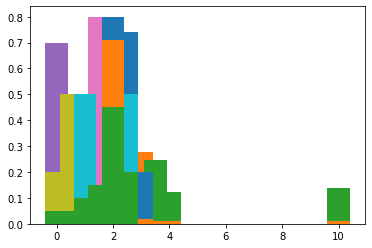

In [20]:
### Robustness checks: focus on NaN estimates (due to missing data or non-convergence)

sim_bins_data = sample_bins
nan_est = data_pkl['Mean'].isna()
missing_data = data_pkl['PRCCPI1'].isna() ## no data to estimate in the first place 

print(str(sum(nan_est))+' missing estimates')
print(str(sum(missing_data))+' of which is due to missing data')

print('\n')
print('All nan estimates due to other reasons\n')
ct=0
figure=plt.plot()
for id in data_pkl.index[(nan_est) & (~missing_data)]:
    print(id)
    print(data_pkl['Mean'][id])
    sim_probs_data= np.flip(np.array([sample_data['PRCCPI'+str(n)][id]/100 for n in range(1,11)]))
    plt.bar(sim_bins_data[1:],sim_probs_data)
    print(sim_probs_data)
    ## do estimation again 
    stats_est=SynDensityStat(sample_bins,
                             sim_probs_data)
    if stats_est is not None:
        print(stats_est['mean'])
    else:
        print('Estimate is None!!!')